<h1>Homework</h1>

The objective is to create a regression model using machine learning. 

You can work with the data science salary or pick a new dataset from [Kaggle](https://www.kaggle.com/datasets?tags=14203-Regression) .

If you are selecting a new dataset be mindful of the "usability" score as it is an indication of how much work you will have to put on pre processing the data.

You can use the lecture notebooks as a guide but you are free to use any methods and tools you like.

Don't forget that understanding the data is part of the process.

And, above all, try to enjoy the process and be kind to yourself when you get stuck.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('dataset\\flight_data.csv', sep=',', index_col=0)

In [3]:
# Data cleaning
df.dropna(inplace=True)
df['departure_time'] = pd.to_datetime(df['departure_time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df['arrival_time'] = pd.to_datetime(df['arrival_time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
#df['duration'] = pd.to_timedelta(df['duration'])

C:\Users\zolta\AppData\Local\Temp\ipykernel_23228\3688130693.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


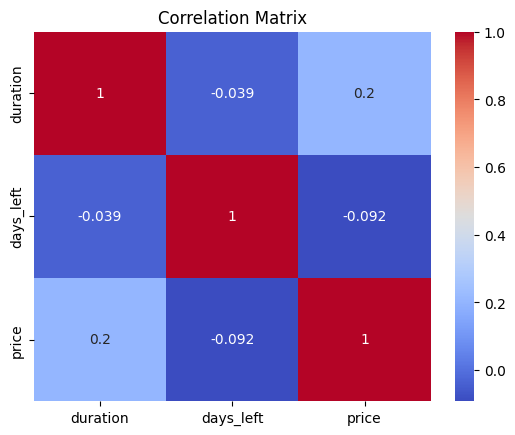

In [4]:
# Data visualization
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

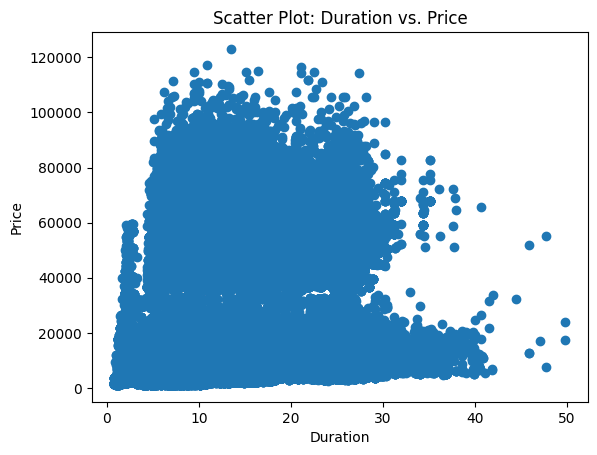

In [5]:
plt.scatter(df['duration'], df['price'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Scatter Plot: Duration vs. Price')
plt.show()

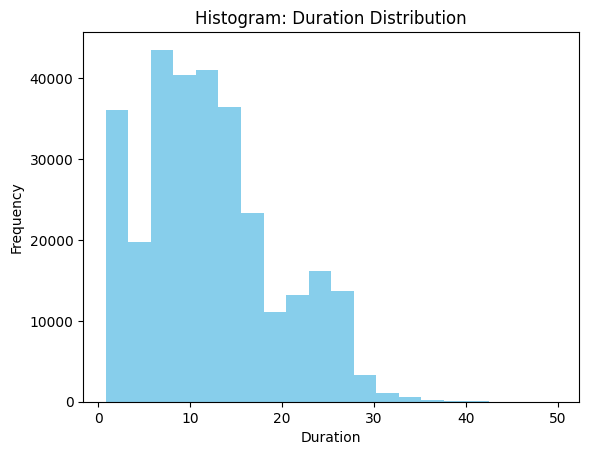

In [6]:
plt.hist(df['duration'], bins=20, color='skyblue')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram: Duration Distribution')
plt.show()

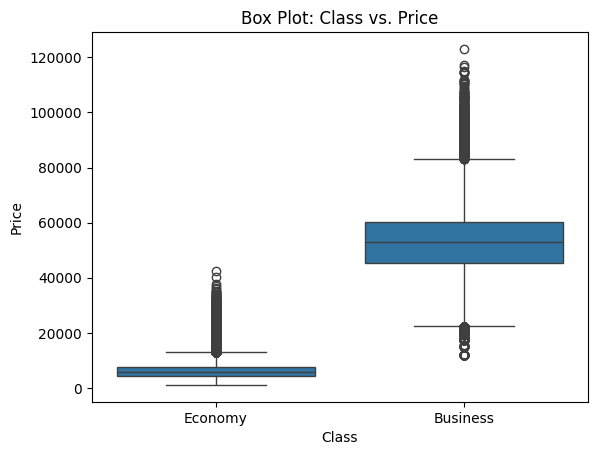

In [7]:
sns.boxplot(x='class', y='price', data=df)
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Box Plot: Class vs. Price')
plt.show()

In [8]:
# Feature selection
X = df[['days_left', 'duration']]
y = df['price']

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# Model selection
regressor = LinearRegression()

In [11]:
# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
# Evaluate the model
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 489277888.86958766
Root Mean Squared Error: 22119.62677961786
R-squared: 0.050784038149766064


In [13]:
# Predictions
new_data = [[10, 2.5], [20, 3.0]]
new_data_pred = regressor.predict(new_data)
print('Predicted prices:', new_data_pred)

Predicted prices: [16966.22359328 15907.21273339]


C:\Users\zolta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


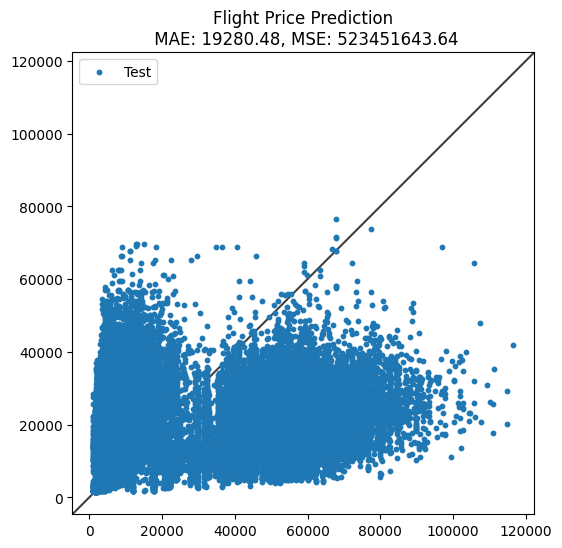

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
ys_mae = mean_absolute_error(y_test, y_pred)
ys_mse = mean_squared_error(y_test, y_pred)

# Create a scatter plot to visualize the predictions
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

ax.scatter(y_test, y_pred, s=10, label='Test')

ax.set_title(f'Flight Price Prediction\n MAE: {ys_mae:.2f}, MSE: {ys_mse:.2f}')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# Now plot both limits against each other
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.show()